In [24]:
from tensorflow.keras.datasets import mnist

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = to_categorical(y_train, num_classes=10) # type: ignore
y_test = to_categorical(y_test, num_classes=10) # type: ignore

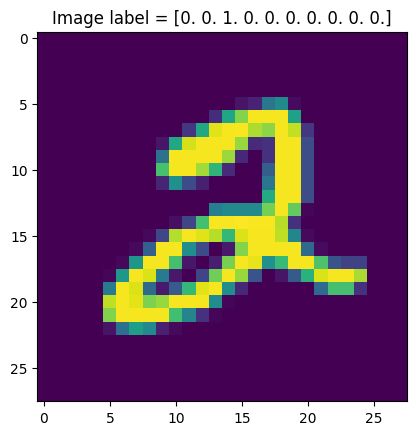

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"Image label = {y_train[5]}")
plt.show()

In [29]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [30]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [31]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # input layer = 784 features
    Dense(5, activation="relu"), # hidden layer with 5 nuerons
    Dense(10, activation="softmax") # hidden layer with 10 neurons
])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=5,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.7363 - loss: 0.8344
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8608 - loss: 0.4724
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8735 - loss: 0.4269
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8848 - loss: 0.3953
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8901 - loss: 0.3764


In [35]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8806 - loss: 0.4062


[0.36538609862327576, 0.8942000269889832]

In [36]:
model.get_weights()

[array([[ 0.06253812, -0.04303258,  0.06024419, -0.06407622, -0.05821459],
        [-0.0677446 , -0.00106091,  0.01046765,  0.02602375,  0.00054179],
        [-0.06478614, -0.07809646, -0.00773208, -0.01596714,  0.04260822],
        ...,
        [-0.0865498 ,  0.03509808, -0.02729572, -0.05335812, -0.0206053 ],
        [ 0.00962528, -0.05208673,  0.02346607, -0.03705359, -0.01596463],
        [ 0.04714273, -0.00750308, -0.08080132,  0.08163568, -0.0327012 ]],
       dtype=float32),
 array([ 0.2519433 , -0.01143558,  0.6857837 , -0.1890268 , -0.15688513],
       dtype=float32),
 array([[-0.1656844 ,  0.4354233 , -0.5270087 ,  0.5433623 , -1.2529038 ,
          0.79994607, -0.48615462, -1.1842457 ,  0.14289416, -0.76852626],
        [-0.87603384,  0.98657566,  0.715192  ,  0.16044426, -0.19912952,
         -0.53980714,  0.45509094, -0.2758944 ,  0.33578905, -0.04599806],
        [-0.9348032 , -0.02775081, -0.93232137,  0.13446805,  0.5433771 ,
         -0.12321115, -1.2623937 ,  0.614807

**Complex Neural Network**

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, concatenate

In [67]:
input_layer =  Input(shape=(28, 28))

In [68]:
flatten = Flatten(input_shape = (28,28))(input_layer)
hidden1 = Dense(128, activation='relu')(flatten)
hidden2 = Dense(160, activation='relu')(flatten)
hidden11 = Dense(64, activation='relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation='softmax')(merge)

In [69]:
model = Model(inputs = input_layer, outputs = output_layer)

In [70]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 784)       │          0 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 128)       │    100,480 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 64)        │      8,256 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 160)       │    125,600 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 224)       │          0 │ dense_32[0][0],   │
│ (Concatenate)       │                   │            │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 10)        │      2,250 │ concatenate_6[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 236,586 (924.16 KB)

 Trainable params: 236,586 (924.16 KB)

 Non-trainable params: 0 (0.00 B)

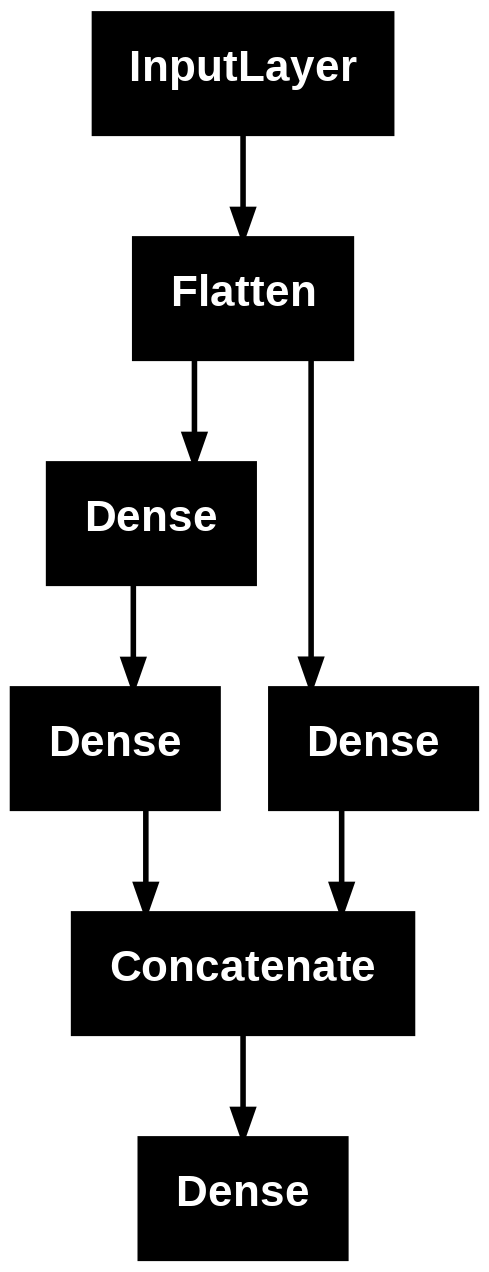

In [71]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(x_train, y_train, epochs=5,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9377 - loss: 0.2139
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9735 - loss: 0.0869
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9810 - loss: 0.0595
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9862 - loss: 0.0425
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9895 - loss: 0.0314


In [74]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9727 - loss: 0.0914


[0.07495581358671188, 0.977400004863739]